# Downloading Apache Spark and Getting Started

In this chapter, we will get you set up with Spark and walk through three simple steps
you can take to get started writing your first standalone application.

We will use local mode, where all the processing is done on a single machine in a
Spark shell—this is an easy way to learn the framework, providing a quick feedback
loop for iteratively performing Spark operations. Using a Spark shell, you can proto‐
type Spark operations with small data sets before writing a complex Spark applica‐
tion, but for large data sets or real work where you want to reap the benefits of
distributed execution, local mode is not suitable—you’ll want to use the YARN or
Kubernetes deployment modes instead.

While the Spark shell only supports Scala, Python, and R, you can write a Spark
application in any of the supported languages (including Java) and issue queries in
Spark SQL. We do expect you to have some familiarity with the language of your
choice.

## Step 1: Downloading Apache Spark
To get started, go to the Spark download page, select “Pre-built for Apache Hadoop
2.7” from the drop-down menu in step 2, and click the “Download Spark” link in step
3 (Figure 2-1).
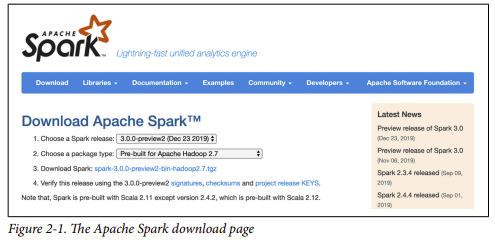
This will download the tarball spark-3.0.0-preview2-bin-hadoop2.7.tgz, which con‐
tains all the Hadoop-related binaries you will need to run Spark in local mode on
your laptop. Alternatively, if you’re going to install it on an existing HDFS or Hadoop
installation, you can select the matching Hadoop version from the drop-down menu.
How to build from source is beyond the scope of this book, but you can read more
about it in the documentation.

At the time this book went to press Apache Spark 3.0 was still in
preview mode, but you can download the latest Spark 3.0 using the
same download method and instructions.

Since the release of Apache Spark 2.2, developers who only care about learning Spark
in Python have the option of installing PySpark from the PyPI repository. If you only
program in Python, you don’t have to install all the other libraries necessary to run
Scala, Java, or R; this makes the binary smaller. To install PySpark from PyPI, just run
pip install pyspark.

There are some extra dependencies that can be installed for SQL, ML, and MLlib, via
pip install pyspark[sql,ml,mllib] (or pip install pyspark[sql] if you only
want the SQL dependencies).

You will need to install Java 8 or above on your machine and set the
JAVA_HOME environment variable. See the documentation for
instructions on how to download and install Java.

If you want to run R in an interpretive shell mode, you must install R and then run
sparkR. To do distributed computing with R, you can also use the open source project
sparklyr, created by the R community.

### Spark’s Directories and Files
We assume that you are running a version of the Linux or macOS operating system
on your laptop or cluster, and all the commands and instructions in this book will be
in that flavor. Once you have finished downloading the tarball, cd to the downloaded
directory, extract the tarball contents with tar -xf spark-3.0.0-preview2-binhadoop2.7.tgz, and cd into that directory and take a look at the contents:
 ~~~
$ cd spark-3.0.0-preview2-bin-hadoop2.7
$ ls
LICENSE R RELEASE conf examples kubernetes python yarn
NOTICE README.md bin data jars licenses sbin
 ~~~
Let’s briefly summarize the intent and purpose of some of these files and directories.
New items were added in Spark 2.x and 3.0, and the contents of some of the existing
files and directories were changed too:<br>
**README.md**<br>
This file contains new detailed instructions on how to use Spark shells, build
Spark from source, run standalone Spark examples, peruse links to Spark docu‐
mentation and configuration guides, and contribute to Spark.<br>
___bin___<br>
This directory, as the name suggests, contains most of the scripts you’ll employ to
interact with Spark, including the Spark shells (spark-sql, pyspark, sparkshell, and sparkR). We will use these shells and executables in this directory
later in this chapter to submit a standalone Spark application using sparksubmit, and write a script that builds and pushes Docker images when running
Spark with Kubernetes support.<br>
___sbin___<br>
Most of the scripts in this directory are administrative in purpose, for starting
and stopping Spark components in the cluster in its various deployment
modes. For details on the deployment modes, see the cheat sheet in Table 1-1 in
Chapter 1.<br>
___kubernetes___<br>
Since the release of Spark 2.4, this directory contains Dockerfiles for creating
Docker images for your Spark distribution on a Kubernetes cluster. It also con‐
tains a file providing instructions on how to build the Spark distribution before
building your Docker images.<br>
___data___<br>
This directory is populated with *.txt files that serve as input for Spark’s compo‐
nents: MLlib, Structured Streaming, and GraphX.<br>
___examples___<br>
For any developer, two imperatives that ease the journey to learning any new
platform are loads of “how-to” code examples and comprehensive documenta‐
tion. Spark provides examples for Java, Python, R, and Scala, and you’ll want to
employ them when learning the framework. We will allude to some of these
examples in this and subsequent chapters.

## Step 2: Using the Scala or PySpark Shell
As mentioned earlier, Spark comes with four widely used interpreters that act like
interactive “shells” and enable ad hoc data analysis: pyspark, spark-shell, sparksql, and sparkR. In many ways, their interactivity imitates shells you’ll already be
familiar with if you have experience with Python, Scala, R, SQL, or Unix operating
system shells such as bash or the Bourne shell.
These shells have been augmented to support connecting to the cluster and to allow
you to load distributed data into Spark workers’ memory. Whether you are dealing
with gigabytes of data or small data sets, Spark shells are conducive to learning Spark
quickly.
To start PySpark, cd to the bin directory and launch a shell by typing pyspark. If you
have installed PySpark from PyPI, then just typing __pyspark__

To start a similar Spark shell with Scala, cd to the bin directory and type **spark-shell**

## Using the Local Machine
Now that you’ve downloaded and installed Spark on your local machine, for the
remainder of this chapter you’ll be using Spark interpretive shells locally. That is,
Spark will be running in local mode.
Refer to Table 1-1 in Chapter 1 for a reminder of which compo‐
nents run where in local mode.
As noted in the previous chapter, Spark computations are expressed as operations.
These operations are then converted into low-level RDD-based bytecode as tasks,
which are distributed to Spark’s executors for execution.
Let’s look at a short example where we read in a text file as a DataFrame, show a sam‐
ple of the strings read, and count the total number of lines in the file. This simple
example illustrates the use of the high-level Structured APIs, which we will cover in
the next chapter. The show(10, false) operation on the DataFrame only displays the
first 10 lines without truncating; by default the truncate Boolean flag is true. Here’s
what this looks like in the Scala shell:

Quite simple. Let’s look at a similar example using the Python interpretive shell,
pyspark:
~~~
 strings = spark.read.text("../README.md")
 strings.show(10, truncate=False)
 strings.count()
~~~

To exit any of the Spark shells, press Ctrl-D. As you can see, this rapid interactivity
with Spark shells is conducive not only to rapid learning but to rapid prototyping,
too.
In the preceding examples, notice the API syntax and signature parity across both
Scala and Python. Throughout Spark’s evolution from 1.x, that has been one (among
many) of the enduring improvements.
Also note that we used the high-level Structured APIs to read a text file into a Spark
DataFrame rather than an RDD. Throughout the book, we will focus more on these
Structured APIs; since Spark 2.x, RDDs are now consigned to low-level APIs.

Every computation expressed in high-level Structured APIs is
decomposed into low-level optimized and generated RDD opera‐
tions and then converted into Scala bytecode for the executors’
JVMs. This generated RDD operation code is not accessible to
users, nor is it the same as the user-facing RDD APIs.

## Step 3: Understanding Spark Application Concepts
Now that you have downloaded Spark, installed it on your laptop in standalone
mode, launched a Spark shell, and executed some short code examples interactively,
you’re ready to take the final step.
To understand what’s happening under the hood with our sample code, you’ll need to
be familiar with some of the key concepts of a Spark application and how the code is transformed and executed as tasks across the Spark executors. We’ll begin by defining
some important terms:<br>
___Application___<br>
A user program built on Spark using its APIs. It consists of a driver program and
executors on the cluster.<br>
___SparkSession___<br>
An object that provides a point of entry to interact with underlying Spark func‐
tionality and allows programming Spark with its APIs. In an interactive Spark
shell, the Spark driver instantiates a SparkSession for you, while in a Spark
application, you create a SparkSession object yourself.<br>
___Job___<br>
A parallel computation consisting of multiple tasks that gets spawned in response
to a Spark action (e.g., save(), collect()).<br>
___Stage___<br>
Each job gets divided into smaller sets of tasks called stages that depend on each
other.<br>
___Task___<br>
A single unit of work or execution that will be sent to a Spark executor.
Let’s dig into these concepts in a little more detail.
## Spark Application and SparkSession
At the core of every Spark application is the Spark driver program, which creates a
SparkSession object. When you’re working with a Spark shell, the driver is part of
the shell and the SparkSession object (accessible via the variable spark) is created for
you, as you saw in the earlier examples when you launched the shells.
In those examples, because you launched the Spark shell locally on your laptop, all the
operations ran locally, in a single JVM. But you can just as easily launch a Spark shell
to analyze data in parallel on a cluster as in local mode. The commands spark-shell
--help or pyspark --help will show you how to connect to the Spark cluster man‐
ager. Figure 2-2 shows how Spark executes on a cluster once you’ve done this.

Once you have a SparkSession, you can program Spark using the APIs to perform
Spark operations.
#### Spark Jobs
During interactive sessions with Spark shells, the driver converts your Spark applica‐
tion into one or more Spark jobs (Figure 2-3). It then transforms each job into a
DAG. This, in essence, is Spark’s execution plan, where each node within a DAG
could be a single or multiple Spark stages.
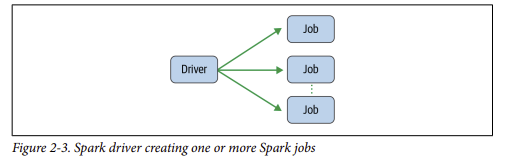
___Spark Stages___<br>
As part of the DAG nodes, stages are created based on what operations can be per‐
formed serially or in parallel (Figure 2-4). Not all Spark operations can happen in a
single stage, so they may be divided into multiple stages. Often stages are delineated
on the operator’s computation boundaries, where they dictate data transfer among
Spark executors.
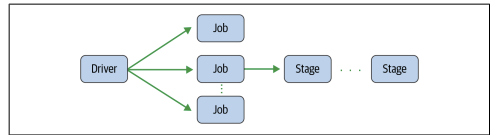
Figure 2-4. Spark job creating one or more stages<br>
___Spark Tasks___<br>
Each stage is comprised of Spark tasks (a unit of execution), which are then federated
across each Spark executor; each task maps to a single core and works on a single par‐
tition of data (Figure 2-5). As such, an executor with 16 cores can have 16 or more
tasks working on 16 or more partitions in parallel, making the execution of Spark’s
tasks exceedingly parallel!
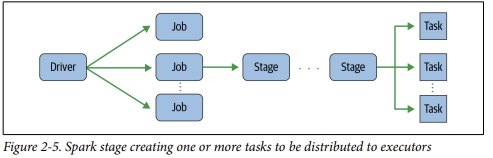

## Transformations, Actions, and Lazy Evaluation
Spark operations on distributed data can be classified into two types: transformations
and actions. Transformations, as the name suggests, transform a Spark DataFrame
into a new DataFrame without altering the original data, giving it the property of
immutability. Put another way, an operation such as select() or filter() will not
change the original DataFrame; instead, it will return the transformed results of the
operation as a new DataFrame.

All transformations are evaluated lazily. That is, their results are not computed imme‐
diately, but they are recorded or remembered as a lineage. A recorded lineage allows
Spark, at a later time in its execution plan, to rearrange certain transformations, coa‐
lesce them, or optimize transformations into stages for more efficient execution. Lazy
evaluation is Spark’s strategy for delaying execution until an action is invoked or data
is “touched” (read from or written to disk).
An action triggers the lazy evaluation of all the recorded transformations. In
Figure 2-6, all transformations T are recorded until the action A is invoked. Each
transformation T produces a new DataFrame.
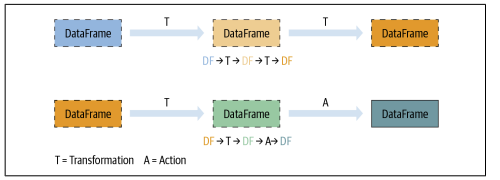
Figure 2-6. Lazy transformations and eager actions
While lazy evaluation allows Spark to optimize your queries by peeking into your
chained transformations, lineage and data immutability provide fault tolerance.
Because Spark records each transformation in its lineage and the DataFrames are
immutable between transformations, it can reproduce its original state by simply
replaying the recorded lineage, giving it resiliency in the event of failures.
Table 2-1 lists some examples of transformations and actions.
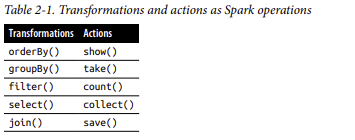
The actions and transformations contribute to a Spark query plan, which we will
cover in the next chapter. Nothing in a query plan is executed until an action is
invoked. The following example, shown both in Python and Scala, has two transfor‐
mations—read() and filter()—and one action—count(). The action is what triggers the execution of all transformations recorded as part of the query execution
plan. In this example, nothing happens until filtered.count() is executed in the
shell:
~~~
# In Python
>>> strings = spark.read.text("../README.md")
>>> filtered = strings.filter(strings.value.contains("Spark"))
>>> filtered.count()
20
// In Scala
scala> import org.apache.spark.sql.functions._
scala> val strings = spark.read.text("../README.md")
scala> val filtered = strings.filter(col("value").contains("Spark"))
scala> filtered.count()
res5: Long = 20
~~~
#### bNarrow and Wide Transformations
As noted, transformations are operations that Spark evaluates lazily. A huge advan‐
tage of the lazy evaluation scheme is that Spark can inspect your computational query
and ascertain how it can optimize it. This optimization can be done by either joining
or pipelining some operations and assigning them to a stage, or breaking them into
stages by determining which operations require a shuffle or exchange of data across
clusters.

Transformations can be classified as having either narrow dependencies or wide
dependencies. Any transformation where a single output partition can be computed
from a single input partition is a narrow transformation. For example, in the previous
code snippet, filter() and contains() represent narrow transformations because
they can operate on a single partition and produce the resulting output partition
without any exchange of data.

However, groupBy() or orderBy() instruct Spark to perform wide transformations,
where data from other partitions is read in, combined, and written to disk. Since each
partition will have its own count of the word that contains the “Spark” word in its row
of data, a count (groupBy()) will force a shuffle of data from each of the executor’s
partitions across the cluster. In this transformation, orderBy() requires output from
other partitions to compute the final aggregation.

Figure 2-7 illustrates the two types of dependencies.
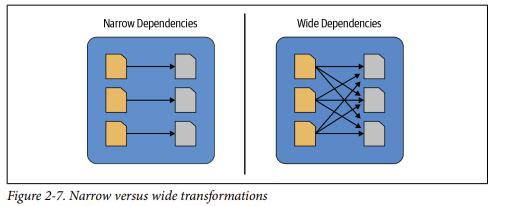

## The Spark UI
Spark includes a graphical user interface that you can use to inspect or monitor Spark
applications in their various stages of decomposition—that is jobs, stages, and tasks.
Depending on how Spark is deployed, the driver launches a web UI, running by
default on port 4040, where you can view metrics and details such as:
* A list of scheduler stages and tasks
* A summary of RDD sizes and memory usage
* Information about the environment
* Information about the running executors
* All the Spark SQL queries<br>
In local mode, you can access this interface at http://\<localhost\>:4040 in a web 
browser.
    
When you launch spark-shell, part of the output shows the local‐
host URL to access at port 4040.
    
Let’s inspect how the Python example from the previous section translates into jobs,
stages, and tasks. To view what the DAG looks like, click on “DAG Visualization” in
the web UI. As Figure 2-8 shows, the driver created a single job and a single stage.    

Notice that there is no Exchange, where data is exchanged between executors,
required because there is only a single stage. The individual operations of the stage
are shown in blue boxes.
Stage 0 is comprised of one task. If you have multiple tasks, they will be executed in
parallel. You can view the details of each stage in the Stages tab, as shown in
Figure 2-9.
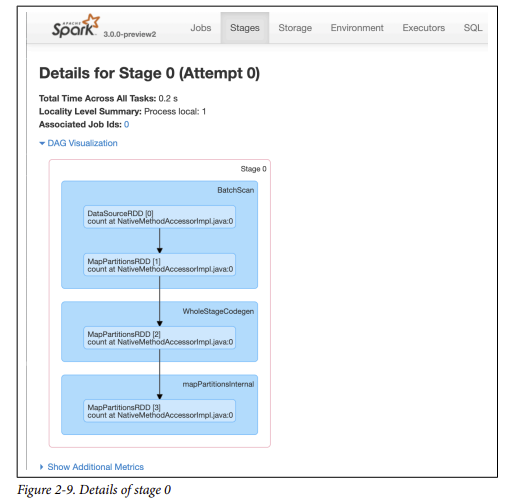
We will cover the Spark UI in more detail in Chapter 7. For now, just note that the UI
provides a microscopic lens into Spark’s internal workings as a tool for debugging
and inspecting


## Your First Standalone Application
To facilitate learning and exploring, the Spark distribution comes with a set of sample
applications for each of Spark’s components. You are welcome to peruse the examples
directory in your installation location to get an idea of what’s available. 
From the installation directory on your local machine, you can run one of the several
Java or Scala sample programs that are provided using the command bin/runexample \<class> 
\[params\]. For example:
~~~    
./bin/run-example JavaWordCount README.md
~~~
This will spew out INFO messages on your console along with a list of each word in
the README.md file and its count (counting words is the “Hello, World” of dis‐
tributed computing).
#### Counting M&Ms for the Cookie Monster
In the previous example, we counted words in a file. If the file were huge, it would be
distributed across a cluster partitioned into small chunks of data, and our Spark pro‐
gram would distribute the task of counting each word in each partition and return us
the final aggregated count. But that example has become a bit of a cliche.
Let’s solve a similar problem, but with a larger data set and using more of Spark’s dis‐
tribution functionality and DataFrame APIs. We will cover the APIs used in this pro‐
gram in later chapters, but for now bear with us.
Among the authors of this book is a data scientist who loves to bake cookies with
M&Ms in them, and she rewards her students in the US states where she frequently
teaches machine learning and data science courses with batches of those cookies. But
she’s data-driven, obviously, and wants to ensure that she gets the right colors of
M&Ms in the cookies for students in the different states (Figure 2-11).
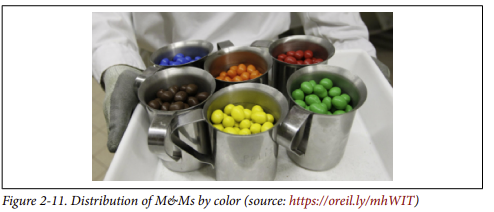
Let’s write a Spark program that reads a file with over 100,000 entries (where each
row or line has a <state, mnm_color, count>) and computes and aggregates the
counts for each color and state. These aggregated counts tell us the colors of M&Ms
favored by students in each state. The complete Python listing is provided in
Example 2-1.

#### Example 2-1. Counting and aggregating M&Ms (Python version)
http://localhost:8888/notebooks/chapter2/count_mnm_pyspark.ipynb
#### Example 2-2. Counting and aggregating M&Ms (Scala version)
http://localhost:8888/notebooks/chapter2/count_mnm_scala.ipynb

## Summary
In this chapter, we covered the three simple steps you need to take to get started with
Apache Spark: downloading the framework, familiarizing yourself with the Scala or
PySpark interactive shell, and getting to grips with high-level Spark application con‐
cepts and terms. We gave a quick overview of the process by which you can use trans‐
formations and actions to write a Spark application, and we briefly introduced using
the Spark UI to examine the jobs, stages, and tasks created.
Finally, through a short example, we showed you how you can use the high-level
Structured APIs to tell Spark what to do—which brings us to the next chapter, where
we examine those APIs in more detail.